# Complex analyses for binary outcomes with feature engineering. 

In [1]:
cd /Users/dcox/Dropbox/InsightFellowship/Glimpse/

/Users/dcox/Dropbox/InsightFellowship/Glimpse


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score
import csv

### Read in the data. 

In [4]:
most_feats = pd.read_csv('most_feats_binary_feateng.csv')

### Set up the dfs for predictor and outcome variables. 

In [5]:
mostFeats_MathOutc = most_feats['ScantronMathPostTestBenchmarks']
mostFeats_ReadOutc = most_feats['ScantronReadingPostTestBenchmarks']
mostFeats_pred = most_feats.drop(['ScantronMathPostTestBenchmarks', 'ScantronReadingPostTestBenchmarks'], axis=1)

### Recode categorical strings with number labels and save those dictionaries. 

In [6]:
# Most features df
mostFeats_predCols = list(mostFeats_pred)
mostFeats_predCodes = []
for i in mostFeats_predCols:
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    d = dict(enumerate(mostFeats_pred[i].cat.categories))
    mostFeats_predCodes.append(d)
    mostFeats_pred[i] = mostFeats_pred[i].astype('category')
    mostFeats_pred[i] = mostFeats_pred[i].cat.codes

## List of algorithms to try
- Ridge Classifier
- Support Vector Machine
- Nearest Neighbors
- Random Forest
- Neural networks

### Some functions we'll use. 

In [7]:
def metrics_display(y_test, y_pred):
    '''Prints basic metrics for initial model assessment.'''
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))  
    print('Precision:', metrics.precision_score(y_test, y_pred))  
    print('Recall:', recall_score(y_test, y_pred))
    print('ROC_AUC:,', roc_auc_score(y_test, y_pred))
    print('F1:', f1_score(y_test, y_pred))

def line_plot(x, title):
    '''Returns lineplot of metric values for model tested.'''
    plt.plot(x, marker='o', color='black')
    plt.xlabel(title.astype(str))
    plt.ylabel('Metric')
    plt.title(title)
    print("Highest Accuracy:", max(x))

### Ridge Regression

Max Accuracy: 0.82
Max F1: 0.81


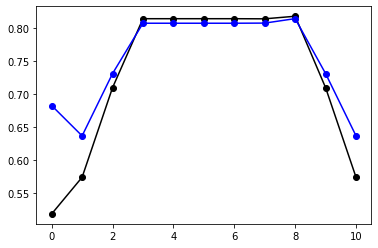

In [8]:
from sklearn.linear_model import RidgeClassifier
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
rr_acc = []
rr_f1 = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = RidgeClassifier(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test_rr)
    rr_acc.append(acc_val)
    f1_val = f1_score(y_test, pred_test_rr)
    rr_f1.append(f1_val)
plt.plot(rr_acc, marker='o', color='black')
plt.plot(rr_f1, marker='o', color='blue')
print("Max Accuracy:", round(max(rr_acc), 2))
print('Max F1:', round(max(rr_f1), 2))

Max Accuracy: 0.84
Max F1: 0.91


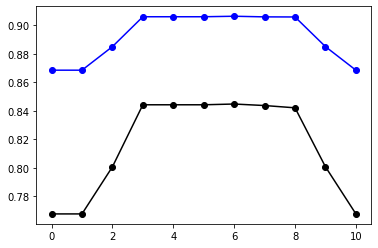

In [9]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
rr_acc = []
rr_f1 = []
pot_alphas = [1e100, 1e10, 1e5, 0.01, 0.1, 1, 10, 100, 1000, 100000, 10000000000]
for i in pot_alphas:
    rr = RidgeClassifier(alpha=i)
    rr.fit(X_train, y_train)
    pred_train_rr= rr.predict(X_train)
    pred_test_rr= rr.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test_rr)
    rr_acc.append(acc_val)
    f1_val = f1_score(y_test, pred_test_rr)
    rr_f1.append(f1_val)
plt.plot(rr_acc, marker='o', color='black')
plt.plot(rr_f1, marker='o', color='blue')
print("Max Accuracy:", round(max(rr_acc), 2))
print('Max F1:', round(max(rr_f1), 2))

### SVM

#### Linear SVC kernel

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

Max Accuracy: 0.78
Max F1: 0.79


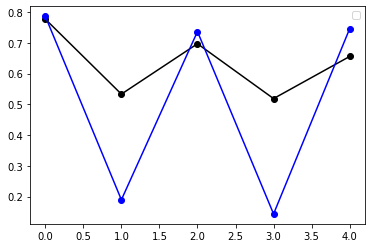

In [10]:
from sklearn import svm
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
C_range = [0.01, 0.1, 1, 10, 100]
for i in C_range:
    classifier = svm.LinearSVC(C=i, max_iter=10000)
    classifier.fit(X_train, y_train)
    pred_train= classifier.predict(X_train)
    pred_test= classifier.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test)
    acc_scores.append(acc_val)
    f1_val = f1_score(y_test, pred_test)
    f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
plt.legend()
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

Max Accuracy: 0.82
Max F1: 0.89


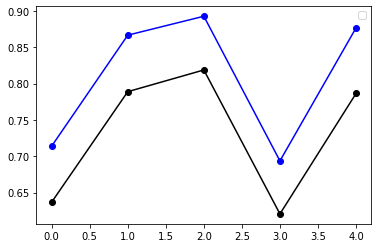

In [11]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
C_range = [0.01, 0.1, 1, 10, 100]
for i in C_range:
    classifier = svm.LinearSVC(C=i, max_iter=10000)
    classifier.fit(X_train, y_train)
    pred_train= classifier.predict(X_train)
    pred_test= classifier.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test)
    acc_scores.append(acc_val)
    f1_val = f1_score(y_test, pred_test)
    f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
plt.legend()
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

#### RBF Kernel

No handles with labels found to put in legend.


Max Accuracy: 0.52
Max F1: 0.68


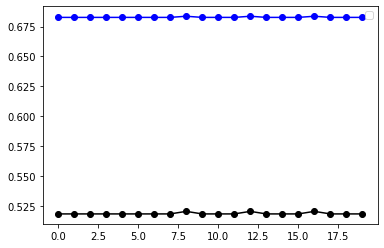

In [12]:
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [1, 10, 100, 1000]
for i in C_range:
    for k in gamma_range:
        classifier = svm.SVC(kernel = 'rbf', C=i, gamma=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
plt.legend()
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

Max Accuracy: 0.77
Max F1: 0.87


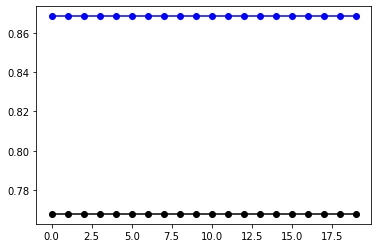

In [13]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [1, 10, 100, 1000]
for i in C_range:
    for k in gamma_range:
        classifier = svm.SVC(kernel = 'rbf', C=i, gamma=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

### Nearest Neighbor

Max Accuracy: 0.78
Max F1: 0.79


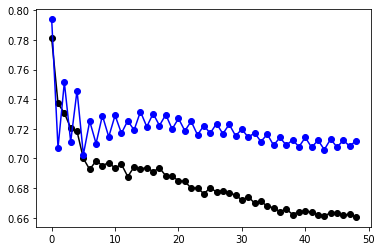

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
neigh_range = list(range(1, 50))
for i in neigh_range:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_train= classifier.predict(X_train)
    pred_test= classifier.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test)
    acc_scores.append(acc_val)
    f1_val = f1_score(y_test, pred_test)
    f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

Max Accuracy: 0.85
Max F1: 0.91


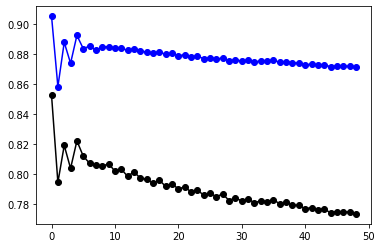

In [15]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
neigh_range = list(range(1, 50))
for i in neigh_range:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    pred_train= classifier.predict(X_train)
    pred_test= classifier.predict(X_test)
    acc_val = metrics.accuracy_score(y_test, pred_test)
    acc_scores.append(acc_val)
    f1_val = f1_score(y_test, pred_test)
    f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

# Random Forest

Max Accuracy: 1.0
Max F1: 1.0


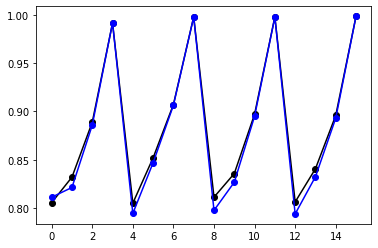

In [16]:
from sklearn.ensemble import RandomForestClassifier
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

Max Accuracy: 1.0
Max F1: 1.0


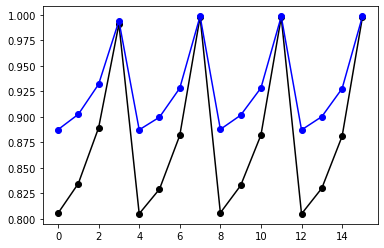

In [17]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
for i in nEst_range:
    for k in depth_range:
        classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

### AdaBoost

Max Accuracy: 0.9
Max F1: 0.91


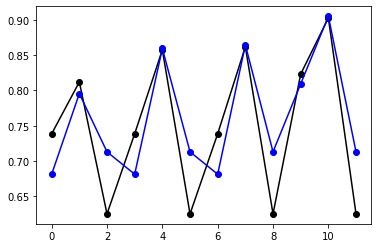

In [19]:
from sklearn.ensemble import AdaBoostClassifier
# Math outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
learning_rate_range = [0.01, 1, 10]
for i in nEst_range:
    for k in learning_rate_range:
        classifier = AdaBoostClassifier(n_estimators=i, learning_rate=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Max Accuracy: 0.9
Max F1: 0.93


/Users/dcox/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


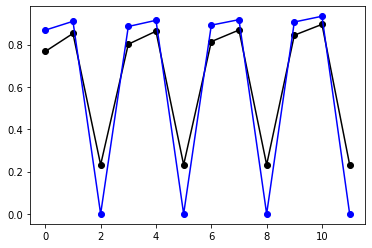

In [20]:
# Reading outcomes. 
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
learning_rate_range = [0.01, 1, 10]
for i in nEst_range:
    for k in learning_rate_range:
        classifier = AdaBoostClassifier(n_estimators=i, learning_rate=k)
        classifier.fit(X_train, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(X_test)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

### Neural Net

Max Accuracy: 0.97
Max F1: 0.97


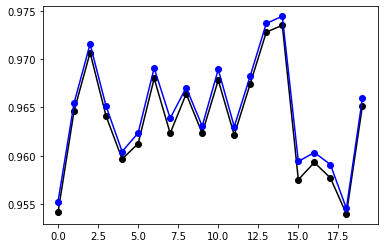

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
# Math outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_MathOutc, test_size=0.20, random_state = 649)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
learning_rate_range = [.001, .001, 0.01, 1, 10]
for i in nEst_range:
    for k in learning_rate_range:
        classifier = MLPClassifier(max_iter = 1000)
        classifier.fit(train_scaled, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(test_scaled)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))

Max Accuracy: 0.96
Max F1: 0.97


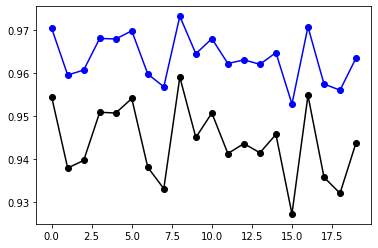

In [27]:
# Reading outcomes
X_train, X_test, y_train, y_test = train_test_split(mostFeats_pred, mostFeats_ReadOutc, test_size=0.20, random_state = 649)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.fit_transform(X_test)
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
learning_rate_range = [0.0001, 0.001, 0.01, 1, 10]
for i in nEst_range:
    for k in learning_rate_range:
        classifier = MLPClassifier(max_iter = 1000)
        classifier.fit(train_scaled, y_train)
        pred_train= classifier.predict(X_train)
        pred_test= classifier.predict(test_scaled)
        acc_val = metrics.accuracy_score(y_test, pred_test)
        acc_scores.append(acc_val)
        f1_val = f1_score(y_test, pred_test)
        f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))